In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [15]:
data = pd.read_csv("PDS.csv")

# Question 1: Sourced candidates Vs. Applied

Text(0.5, 1, 'Source of applicants')

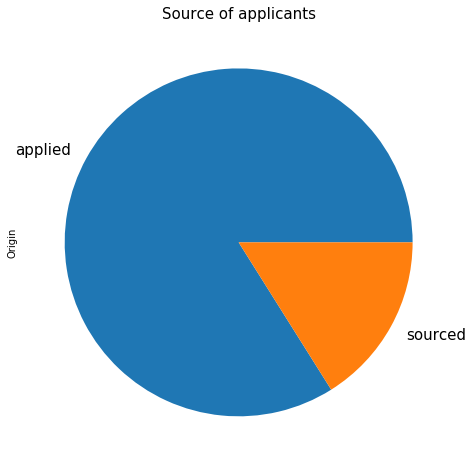

In [68]:
data['Origin'].value_counts().plot(kind='pie', figsize=(8,8), fontsize=15)
plt.title("Source of applicantions", y=1, fontsize=15)


# Question 2: What are the most popular channels to reach these candidates?

Text(0.5, 1.02, 'Count of applicants by Job boards')

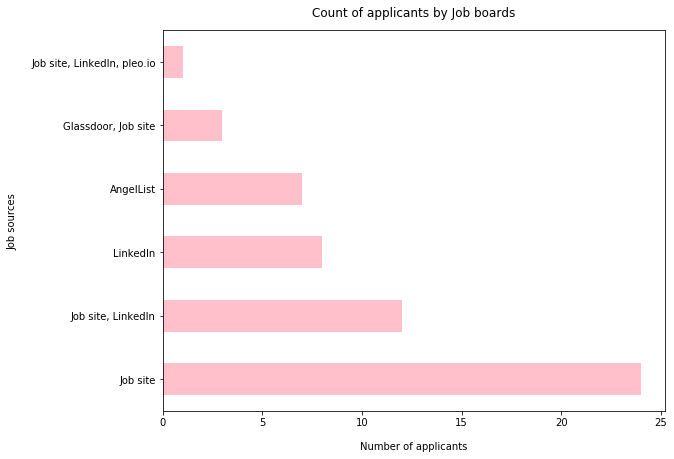

In [63]:
data['Sources'].value_counts().plot(kind='barh', figsize=(9, 7), color='pink')
plt.xlabel("Number of applicants", labelpad=14)
plt.ylabel("Job sources", labelpad=14)
plt.title("Count of applicants by Job boards", y=1.02)

# Question 3: What is the quality of candidates who applied and why were a majority of them not hired? 

Text(0.5, 1, 'Reasons for archive')

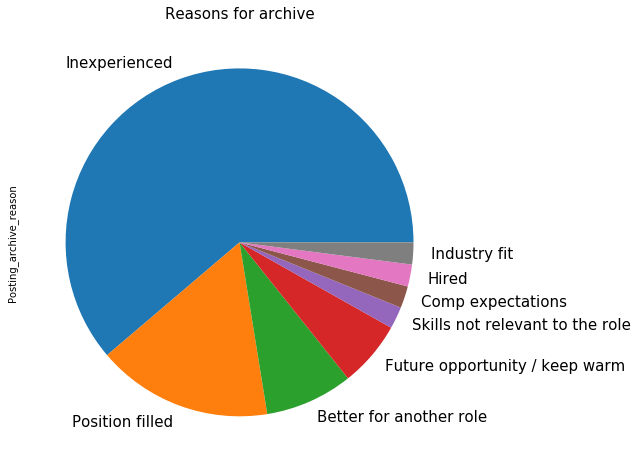

In [65]:
data['Posting_archive_reason'].value_counts().plot(kind='pie', figsize=(8,8), fontsize=15)
plt.title("Reasons for archive", y=1, fontsize=15)

# Question 4: By looking at the funnel, what were the stages that many of the candidates dropped off from? 

In [74]:
data.notnull().sum()

Company                          54
Schools                          33
Location                         30
Origin                           56
Sources                          55
Applied_at_gmt                   56
Profile_archive_status           56
Posting_archive_reason           49
Posting_archived_gmt             49
Current_stage                    56
Last_story_at_gmt                56
Last_advanced_at_gmt             56
Start_date                        1
Stage_new_lead                    9
Stage_reached_out                 0
Stage_responded                   0
Stage_new applicant              46
Stage_quality_review             12
Stage_contacted                   2
Stage_recruiter_screen            7
Stage - Hiring Manager / skip     4
Stage_team_interview              1
Stage_offer                       1
dtype: int64

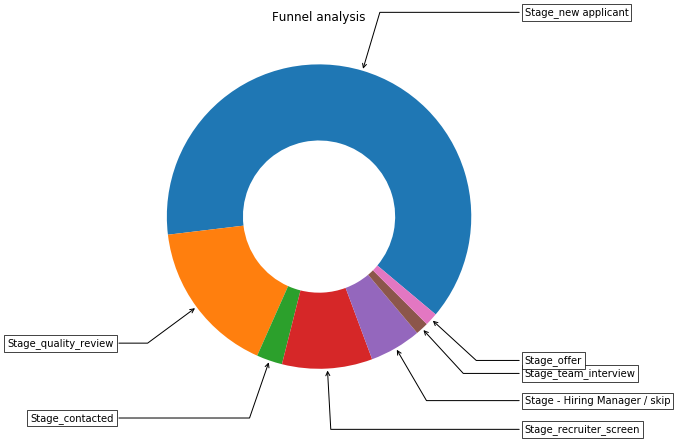

In [82]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

recipe = ["Stage_new applicant",
          "Stage_quality_review",
          "Stage_contacted",
          "Stage_recruiter_screen",
          "Stage - Hiring Manager / skip",
          "Stage_team_interview",
          "Stage_offer"]

applicants = [46, 12, 2, 7, 4, 1, 1]

wedges, texts = ax.pie(applicants, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square, pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops= dict(arrowstyle="->"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),horizontalalignment=horizontalalignment, **kw)

ax.set_title("Funnel analysis")

plt.show()